<a href="https://colab.research.google.com/github/cpvivek/Global-Terrorism-Database-EDA/blob/main/Global_Terrorism_Database_EDA__Vivek_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Global Terrorism Database
Global Terrorism Database (GTD) is a dataset maintained by National Consortium for the Study of Terrorism and Responses to Terrorism (START), and contains the record of terrorism activities around the globe since 1970.

# Scope of the Project
Since this is an exploratory data analysis project, the scope of the project would be limited to deriving meaningful insights/patterns from the dataset, on a global, regional (Primarily South Asian) and national(India) level. 
The focus here would not essentialy be to obtain solutions to problems pertaining to terrorism, but rather to derive intuitons from the dataset.

My contribution to the project as an individual are focused on following deliverables:



1. Visual Representation of attacks over the globe.
2. Word cloud displaying the group names with font size proportional to frequency of attacks.
3. Which group has the highest success rate?
4. Success rate of different attack types.
5. Actions of major groups.
6. Which group has attacked most number of countries?
7. Heat Maps
8. Tree Maps
9. Time lines





# Data Preparation

Since this is a huge data set with over 136 fields and 1.8 lakh rows, we need to weed out unrequired fields, fill NaN values appropriately, and rename the fields to suit our convenience.

In [1]:
#let's take help of following libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #I prefer to use plotly.express predominantly for most of my visualisation. 
import plotly.graph_objects as go   

In [2]:
pip install --upgrade plotly

In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following dataset contains records of terrorist attacks from 1970 all the way to 2017

In [4]:
# Reading the dataset. 
gtd_global_primary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better Pro Program/Capstone Projects/EDA Capstone/Data Sets/Global Terrorism Data/Global Terrorism Data_2017.csv',encoding='ISO-8859-1')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
gtd_global_primary.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#columns in the dataset:
list(gtd_global_primary)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

A lot of the field names here are hard to make sense of. So here's a code book if you're curious.

https://www.start.umd.edu/gtd/downloads/Codebook.pdf

In [7]:
#cleaning up dataset and selecting fields that I believe we need for the analysis
gtd_global=gtd_global_primary[['eventid','iyear','imonth','iday','country_txt','region_txt', 'city','provstate',
                       'latitude','longitude','summary','success','suicide','attacktype1_txt','targtype1_txt',
                       'gname','claimed','motive','weaptype1_txt','nkill','nwound','propvalue']]
                       

In [8]:
#cleaning up the NaN values.
gtd_global['country_txt'].fillna('Unknown',inplace=True)
gtd_global['region_txt'].fillna('Unknown',inplace=True)
gtd_global['city'].fillna('Unknown',inplace=True)
gtd_global['provstate'].fillna('Unknown',inplace=True)
gtd_global['latitude'].fillna('Unknown',inplace=True)
gtd_global['longitude'].fillna('Unknown',inplace=True)
gtd_global['summary'].fillna('Unknown',inplace=True)
gtd_global['success'].fillna('Unknown',inplace=True)
gtd_global['suicide'].fillna('Unknown',inplace=True)
gtd_global['attacktype1_txt'].fillna('Unknown',inplace=True)
gtd_global['targtype1_txt'].fillna('Unknown',inplace=True)
gtd_global['gname'].fillna('Unknown',inplace=True)
gtd_global['claimed'].fillna(0,inplace=True) #You can't really 'not know' if its claimed. :/. I'm taking the liberty to assume the NaN values here are unclaimed.
gtd_global['motive'].fillna('Unknown',inplace=True)
gtd_global['weaptype1_txt'].fillna('Unknown',inplace=True)
gtd_global['nkill'].fillna(0,inplace=True)
gtd_global['nwound'].fillna(0,inplace=True)
gtd_global['propvalue'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
#renaming the columns
gtd_global.rename(columns={'iyear':'year',
                           'imonth':'month',
                           'iday':'day',
                           'country_txt':'country',
                           'region_txt':'region',
                           'provstate':'state',
                           'attacktype1_txt':'attack_type',
                           'targtype1_txt':'target_type',
                           'gname':'organisation',
                           'weaptype1_txt':'weapon_type'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
#adding casuality column to the data frame. Casulities= nwound+casuality
gtd_global['casuality']=gtd_global.nkill+gtd_global.nwound

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#creating subsets for the regional and national level analysis
gtd_SA=gtd_global[gtd_global.region=='South Asia']
gtd_india=gtd_global[gtd_global.country=='India']


#1. Global Visualisation of attacks over the world
Let's zoom out and have a look at the situation.

In [12]:
#creating a df with frequency of attacks grouped by countries
gtd_country=gtd_global.groupby('country')['eventid'].count().reset_index() #this would give us total number of attack in each country over the time

gtd_country_timeline=gtd_global.groupby(['year','country'])['eventid'].count().reset_index() # this dataframe would help us with a timeline of every year since 1970


In [13]:
#visualisation
total_attacks=px.choropleth( gtd_country,locations='country',locationmode='country names',color='eventid',
                  hover_name='country',projection='orthographic',title='Total number of attacks(1970-2019)'
                  ,color_continuous_scale = px.colors.sequential.Plasma,
                  labels={'eventid':'attacks'})

total_attacks.show()


timeline=px.choropleth(gtd_country_timeline,locations='country',locationmode='country names',color='eventid',
                  hover_name='country',title='Time line of attacks in each year from 1970 to 2019',
                  color_continuous_scale = px.colors.sequential.Plasma,
                  animation_frame='year',
                  labels={'eventid':'attacks'})

timeline.show()

print('use the animation frame above to navigate through years')

use the animation frame above to navigate through years


**Remarks**
1. It's evident from the figure that the terrorist attacks are quite concentrated in a handful of countries like Afghanistan, Pakistan, Iraq, India etc.

2. It can be observed that things starteg getting grim for India in the late 80s, where it started gaining more traction than the rest of the countries.

# 2. Word cloud displaying the group names with font size proportional to frequency of attacks.
Word cloud is a useful way to assess the data at a glance

In [14]:
#df with organisations and corresponding frequency of attacks
global_org_frequency=gtd_global.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [15]:
#creating dictionary with group names and corresponding frequency of attacks. We'll be using this dictionary to generate the wordlcoud
organisation_dict={}
for group,attacks in zip(global_org_frequency.organisation,global_org_frequency.attacks):
  organisation_dict[group]=attacks

In [16]:
from wordcloud import WordCloud #Importing wordcloud library.
plt.rcParams['figure.figsize']=(20,20) #setting figure size

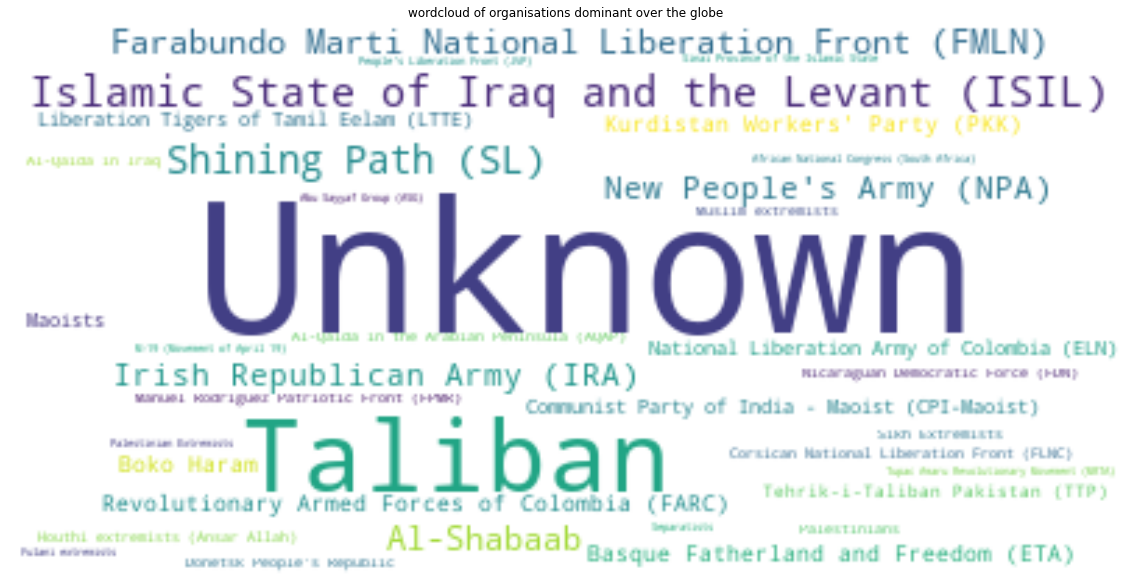

In [17]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordcloud of organisations dominant over the globe')
plt.axis("off")
plt.show()



**Remarks**:

The unknown faction, accounts for majority of the attacks. These could be the attacks which are not claimed by any organisation, or work of an individual or small group of individuals, belonging to no formal organisation.
Putting aside the unknown, Taliban clearly towers above the the rest in terms of attack frequency.
ISIL, IRA, NPA, CPI(Maiosts), PKK are few other noteable organisations.

# South Asia

In [18]:
#df with organisation and corresponding frequency of attacks
SA_org_frequency=gtd_SA.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [19]:
organisation_sth_asia_dict={} #We'll use this dict to generate the wordcloud
for group,attacks in zip(SA_org_frequency.organisation,SA_org_frequency.attacks):
  organisation_sth_asia_dict[group]=attacks

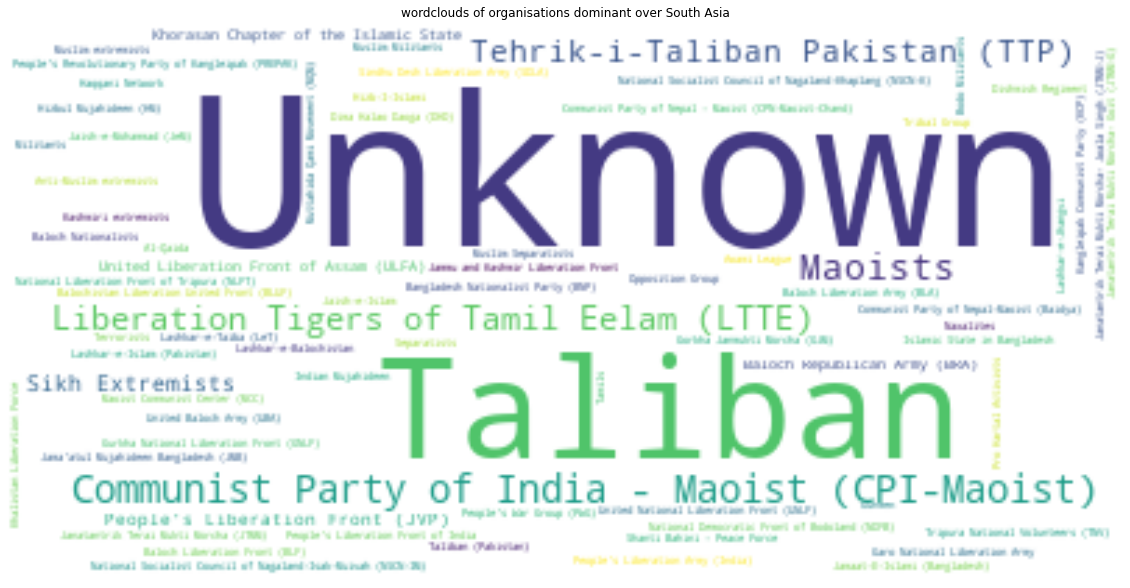

Word cloud of group attack frequencies across South East Asia


In [20]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_sth_asia_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over South Asia')
plt.axis("off")
plt.show()
print("Word cloud of group attack frequencies across South East Asia")



Remarks:

1. The unknown faction remains the major contributor here too.
2. Taliban again, leads in terms of attacks over the South Asia Region.
3. Communist Party of India(Maoists), TTP, LTTE are few other organisation with considerable attack frequency.

**India**

In [21]:
india_org_frequency=gtd_india.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [22]:
organisation_india_dict={}
for group,attacks in zip(india_org_frequency.organisation,india_org_frequency.attacks):
  organisation_india_dict[group]=attacks

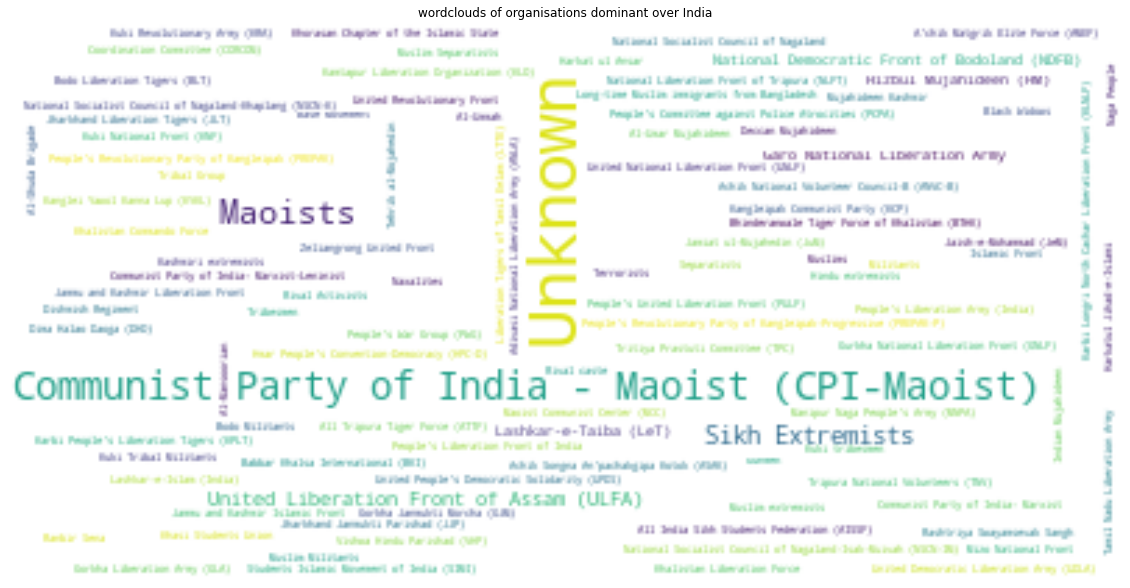

In [23]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_india_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over India')
plt.axis("off")
plt.show()

**Remarks:**

1. CPI(Maoists) is the organisation with greatest attack frequency in India.
2. We could say the majority of the attacks are caused by the top few organisations here.
3. Sikh Extremists, Maoists, ULFA are few of the major players here.

# 3. Which group has highest success rate at all three levels?
Are the groups with the most attack frequency the most succesful ones?

**Count plot of succesful and unsuccesful attacks over the years**

In [38]:
#setting figure parameters
plt.rcParams['figure.figsize']=[25,10]

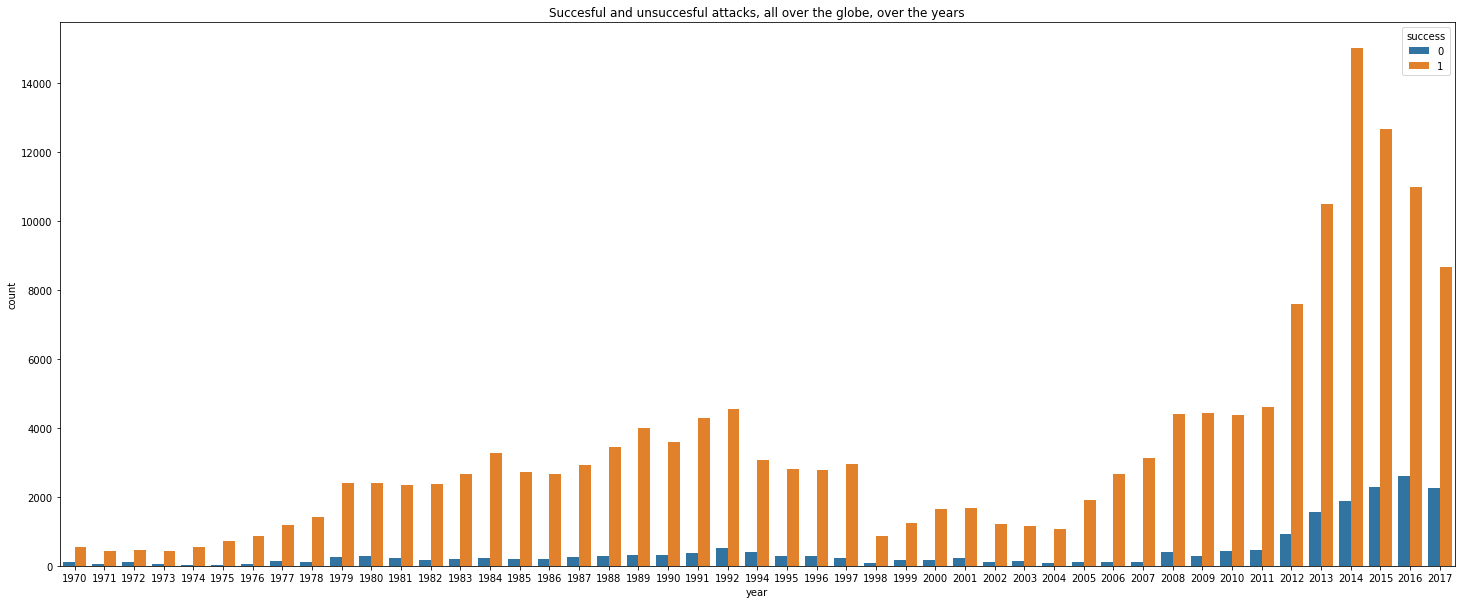

In [39]:
#Global
sns.countplot(x='year',hue='success',data=gtd_global)
plt.title('Succesful and unsuccesful attacks, all over the globe, over the years')
plt.show()

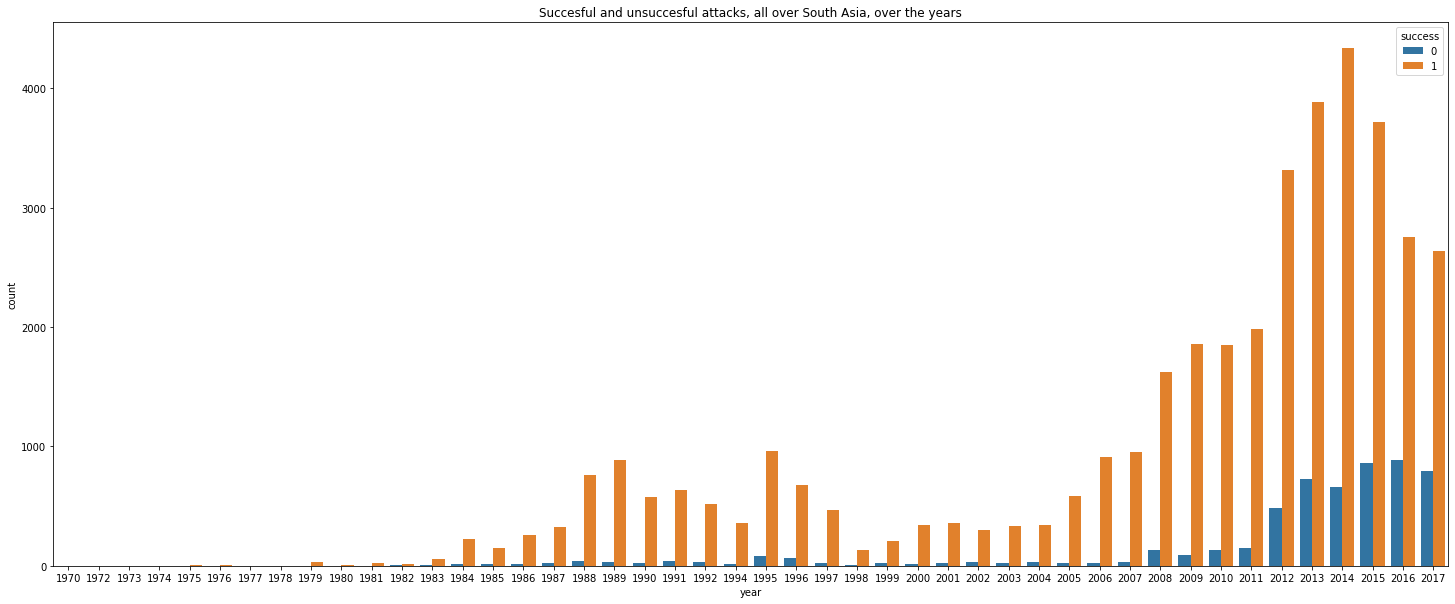

In [40]:
#South Asia
sns.countplot(x='year',hue='success',data=gtd_SA)
plt.title('Succesful and unsuccesful attacks, all over South Asia, over the years')
plt.show()

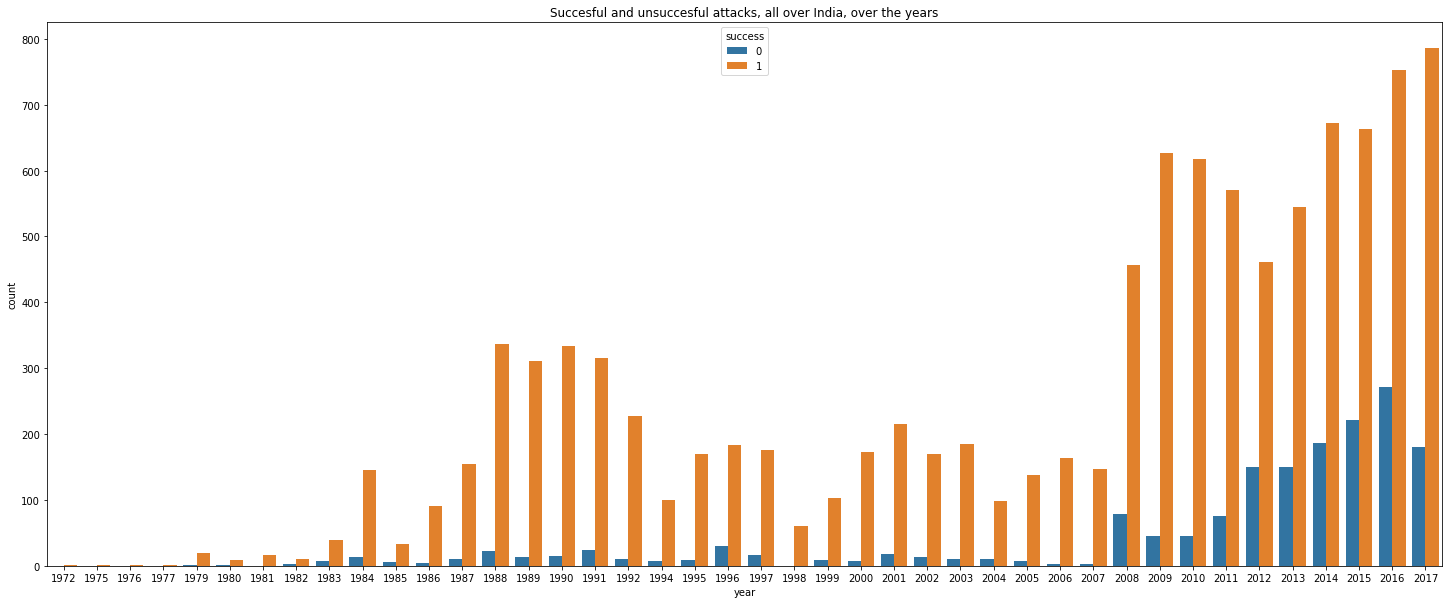

In [41]:
#India
sns.countplot(x='year',hue='success',data=gtd_india)
plt.title('Succesful and unsuccesful attacks, all over India, over the years')
plt.show()


**Remarks**

1. A common trend can be observced at all three levels that the number of succesful attacks have been on a gradual increase over the time.
2. But the unsuccesful attacks or in other words, our ability to render those attacks unsuccesful has not been able to keep up with it. In short, Terrorism has been winning over the years.

**Calculating success rates of organisations**

In [59]:
#Sorting the attack fequencies in descending order
global_org_frequency.sort_values('attacks',ascending=False,inplace=True)
india_org_frequency.sort_values('attacks',ascending=False,inplace=True)
SA_org_frequency.sort_values('attacks',ascending=False,inplace=True)

In [60]:
#creating df with number of succesful attacks
global_org_success=gtd_global.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)#Since the succesful attacks has been represented by 
                                                                                                                           #1,the sum woud give us total number of succesful attacks
SA_org_success=gtd_SA.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)

india_org_success=gtd_india.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)

In [61]:
#reseting index of the organisation frequency df and group_success_df to be able to merge df going forwards
global_org_frequency.reset_index(drop=True,inplace=True)
global_org_success.reset_index(drop=True,inplace=True)

SA_org_frequency.reset_index(drop=True,inplace=True)
SA_org_success.reset_index(drop=True,inplace=True)

india_org_frequency.reset_index(drop=True,inplace=True)
india_org_success.reset_index(drop=True, inplace=True)

In [62]:
#adding attack column to the succes data frame 
global_org_success['attacks']=global_org_frequency.attacks
SA_org_success['attacks']=SA_org_frequency.attacks
india_org_success['attacks']=india_org_frequency.attacks

In [63]:
#sorting on basis of oganisation to maintain consistency. We will sort the df on basis of attacks later on when everything is settled
global_org_success.sort_values('organisation',inplace=True)
SA_org_success.sort_values('organisation',inplace=True)
india_org_success.sort_values('organisation',inplace=True)

In [64]:
#calculating succes rate= number of succesful attacks / number of total attacks * 100
global_org_success['succes_rate_percentage']=(global_org_success.success/global_org_success.attacks)*100
india_org_success['succes_rate_percentage']=(india_org_success.success/india_org_success.attacks)*100
SA_org_success['succes_rate_percentage']=(SA_org_success.success/SA_org_success.attacks)*100

Now are succes rate dataframe is ready. Let's take a look at one of them

In [65]:
global_org_success.head()

,organisation,success,attacks,succes_rate_percentage
585,1 May,9,10,90.0
905,14 K Triad,4,5,80.0
2683,14 March Coalition,1,1,100.0
1256,14th of December Command,3,3,100.0
2682,15th of September Liberation Legion,1,1,100.0


So the dataframe is currently sorted on basis of organisatio name. We need a more sensible parameter. We can look at the organisations with highest succes rate probably?
But since there are quite a few organisations with very low number of attack frequency, and they are bound to have a hugh succes rate owing to that. For instance, an organisation has carried out 1 attack and that's succesful! WHOA! 100% succes rate! *No not quite so :/. So succes rate isn't the parameter we should be sorting them on.

Attack frequency is. We should be looking at succes rate of organisation with high number of attacks. Let's get to that.

In [66]:
print("Groups with highest attack frequency over the globe, and their success rate")
global_org_success.sort_values('attacks',ascending=False,inplace=True)
global_org_success.head(6)

Groups with highest attack frequency over the globe, and their success rate


,organisation,success,attacks,succes_rate_percentage
0,Unknown,71748,82782,86.671015
1,Taliban,6680,7478,89.328698
2,Islamic State of Iraq and the Levant (ISIL),4759,5613,84.785320
3,Shining Path (SL),4337,4555,95.214050
4,Farabundo Marti National Liberation Front (FMLN),3317,3351,98.985377
5,Al-Shabaab,3016,3288,91.727494


In [67]:
print("Groups with highest attack frequency over south east Asia, and their success rate")
SA_org_success.sort_values('attacks',ascending=False,inplace=True)
SA_org_success.head(6)

Groups with highest attack frequency over south east Asia, and their success rate


,organisation,success,attacks,succes_rate_percentage
0,Unknown,18385,21913,83.899968
1,Taliban,6679,7477,89.327270
2,Communist Party of India - Maoist (CPI-Maoist),1774,1878,94.462194
3,Liberation Tigers of Tamil Eelam (LTTE),1529,1625,94.092308
4,Maoists,1304,1604,81.296758
5,Tehrik-i-Taliban Pakistan (TTP),1267,1350,93.851852


In [68]:
print("Groups with top 5 highest attack frequency in India, and their success rate")
india_org_success.sort_values('attacks',ascending=False,inplace=True)
india_org_success.head(6)

Groups with top 5 highest attack frequency in India, and their success rate


,organisation,success,attacks,succes_rate_percentage
0,Unknown,3337,4263,78.278208
1,Communist Party of India - Maoist (CPI-Maoist),1773,1877,94.459243
2,Maoists,1083,1396,77.578797
3,Sikh Extremists,667,710,93.943662
4,United Liberation Front of Assam (ULFA),327,357,91.596639
5,Hizbul Mujahideen (HM),182,199,91.457286


Let's put up some visualisations for these

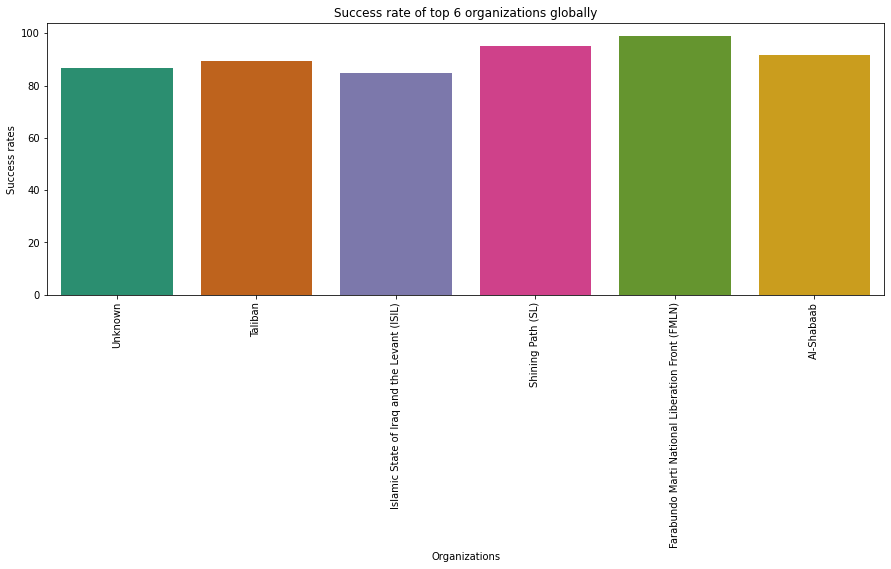

In [81]:
#plotting succes rates across the globe, South Asia and India
plt.rcParams['figure.figsize']=[15,5]

#global
sns.barplot(x=global_org_success[:6].organisation, #bar plot
            y=global_org_success[:6].succes_rate_percentage,
            palette='Dark2')
plt.title('Success rate of top 6 organizations globally')
plt.xlabel("Organizations")
plt.ylabel("Success rates")
plt.xticks(rotation=90)
plt.show()

table_global = go.Figure(data=[go.Table(  #tabular representation
    header=dict(values=list(global_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[global_org_success[:6].organisation, global_org_success[:6].success, global_org_success[:6].attacks,global_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_global.show()

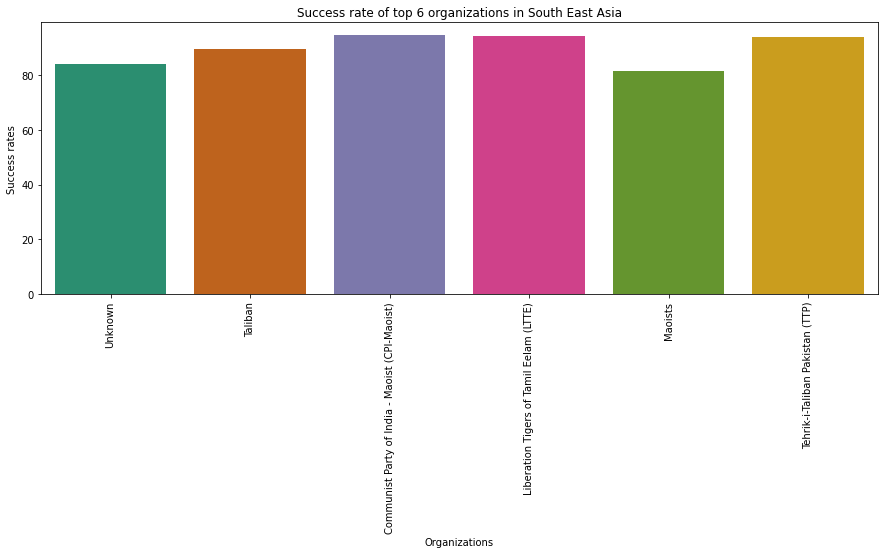

In [79]:
#south asian
sns.barplot(x=SA_org_success[:6].organisation,y=SA_org_success[:6].succes_rate_percentage,palette='Dark2')
plt.title('Success rate of top 6 organizations in South East Asia')
plt.xlabel("Organizations")
plt.ylabel("Success rates")
plt.xticks(rotation=90)
plt.show()

table_SA = go.Figure(data=[go.Table(
    header=dict(values=list(SA_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[SA_org_success[:6].organisation, SA_org_success[:6].success, SA_org_success[:6].attacks,SA_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_SA.show()

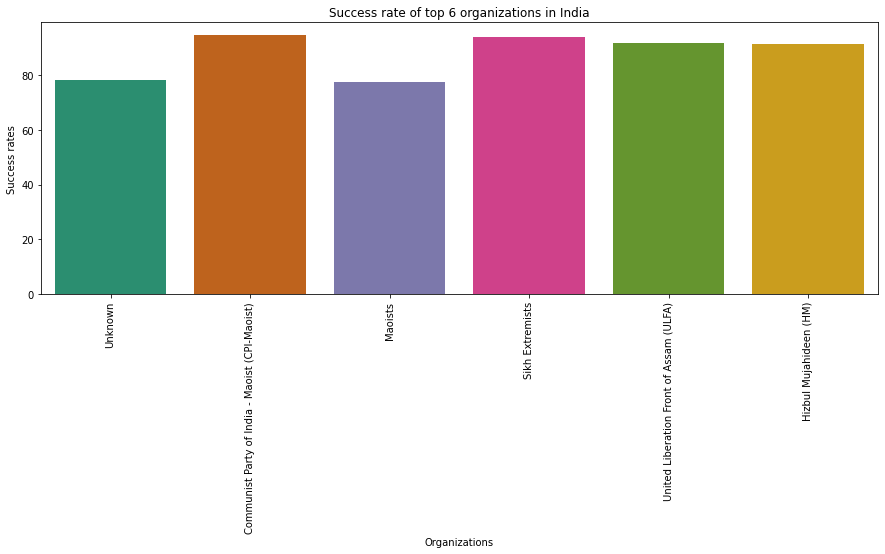

In [80]:
#India
sns.barplot(x=india_org_success[:6].organisation,y=india_org_success[:6].succes_rate_percentage,palette='Dark2')
plt.title('Success rate of top 6 organizations in India')
plt.xlabel("Organizations")
plt.ylabel("Success rates")
plt.xticks(rotation=90)
plt.show()

table_india = go.Figure(data=[go.Table(
    header=dict(values=list(india_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[india_org_success[:6].organisation, india_org_success[:6].success, india_org_success[:6].attacks,india_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_india.show()